In [1]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from tqdm import tqdm
import geopandas as gpd
from shapely.geometry import Point  #Polygon
from tqdm import tqdm
from itertools import product

In [1]:
!ls

Income_per_Capita_(census_tract).csv   fuels_utilities_cpi.csv
LA_LB_AN_edu.csv                       fuels_utilities_cpi.xlsx
LA_crime_occ.csv                       hospital_facility_la.csv
LA_edu_score.csv                       housing(shelter)_cpi.csv
LA_home_values.csv                     housing(shelter)_cpi.xlsx
LA_home_values_oneNeigh.csv            l.a. county neighborhood (current).dbf
LA_places_cleaned.csv                  l.a. county neighborhood (current).shp
LA_places_complete.csv                 l.a. county neighborhood (current).shx
ODN_Education.csv                      la_employ.csv
all_items_cpi.csv                      la_neigh_home_values.csv
all_items_cpi.xlsx                     la_pop_2010_census.csv
apparel_cpi.csv                        la_pop_race_2021.csv
apparel_cpi.xlsx                       la_population_dense_2000.csv
biz_type                               medicare_cpi.csv
commodity_service_cpi.csv              medicare_cpi.xlsx
commodity_service_cpi.xlsx

In [31]:
# Hosuing prices # trend
home_values = pd.read_csv('LA_home_values.csv', encoding="ISO-8859-1")
home_values_one = pd.read_csv('la_neigh_home_values.csv')


# crime data # lat/lon
crime_recent = pd.read_csv('crime_datapp.csv')
crime_old = pd.read_csv('crime_data_la.csv')
# LA employment # LA-LB-Orange
la_employ=pd.read_csv('employment.csv')
# CPIs # LA-LB-Orange # trend
edu_cpi=pd.read_csv('education_cpi.csv')
food_bev_cpi=pd.read_csv('food_bev_cpi.csv')
fuels_utilities_cpi=pd.read_csv('fuels_utilities_cpi.csv')
housing_cpi = pd.read_csv('housing(shelter)_cpi.csv')
medicare_cpi=pd.read_csv('medicare_cpi.csv')
other_goods_cpi=pd.read_csv('other_goods_cpi.csv')
recreation_cpi=pd.read_csv('recreation_cpi.csv')
transportation_cpi=pd.read_csv('transportation_cpi.csv')
service_cpi=pd.read_csv('commodity_service_cpi.csv')
apparel_cpi=pd.read_csv('apparel_cpi.csv')
all_cpi=pd.read_csv('all_items_cpi.csv')
# Education
edu_stats=pd.read_csv('ODN_Education.csv') # All United States


# LA population # no trend
la_pop_dense=pd.read_csv('la_population_dense_2000.csv')
la_pop_race=pd.read_csv('la_pop_race_2021.csv')
la_pop_census=pd.read_csv('la_pop_2010_census.csv')
socal_pop=pd.read_csv('socal_pop.csv') # trend but county level
# Proximity to hospital and park # no trend #lat/lon
hospital_loc = pd.read_csv('hospital_facility_la.csv')
park_loc= pd.read_csv('park_facilities_la.csv')
# Community social aspects # no trend #lat/lon
la_places=pd.read_csv('LA_places_cleaned.csv') #195008 places
la_restaurants=pd.read_csv('LA_places_complete.csv') # 3669 restaurants with menus
# Income per capita
income_la=pd.read_csv('Income_per_Capita_(census_tract).csv') # LA


# Biz type # California
cbp_2016 = pd.read_csv('biz_type/2016cbp.csv')
cbp_2017 = pd.read_csv('biz_type/2017cbp.csv')
cbp_2018 = pd.read_csv('biz_type/2018cbp.csv')
cbp_2019 = pd.read_csv('biz_type/2019cbp.csv')
cbp_2020 = pd.read_csv('biz_type/2020cbp.csv')

In [ ]:
# CPI(by month), Employment(by month),
#Education(by year, 2013-2018), Crime(by year,2010-2022), Population(by year,2010-2022) => City growth forecasting

In [350]:
# crime_all=pd.concat([crime_recent, crime_old[list(crime_recent.columns)]], ignore_index=True)
# pd.DataFrame(crime_all).to_csv('crime_all.csv', encoding='utf-8', index=False)

### Education data preprocessing

In [51]:
edu_ca=[]
for i in range(len(edu_stats)):
    if 'CA ' in edu_stats['name'][i] or 'California' in edu_stats['name'][i]:
        edu_ca.append(i)

In [52]:
ca_edu=edu_stats.iloc[edu_ca]
ca_edu=ca_edu.reset_index(drop=True)

In [86]:
for i in set(ca_edu.loc[ca_edu['type']=='msa']['name']):
    if 'Los Angeles' in i:
        print(i)

Los Angeles-Long Beach-Anaheim, CA Metro Area
Los Angeles-Long Beach-Santa Ana, CA Metro Area


In [87]:
lalban=ca_edu.loc[ca_edu['name']=='Los Angeles-Long Beach-Anaheim, CA Metro Area']

In [101]:
common_var=list(lalban.loc[lalban['year']==2015]['variable'])

In [133]:
lalban_edu=lalban[lalban['variable'].isin(common_var)].sort_values(by=['year']).reset_index(drop=True)

In [152]:
#pd.DataFrame(lalban_edu).to_csv('LA_LB_AN_edu.csv', encoding='utf-8', index=False)

In [322]:
# Education score = sum of all percentage *degree - percentage less than 9th grade
edu_score=[]
for i in set(lalban_edu['year']):
    tmp=lalban_edu.loc[lalban_edu['year']==i].sort_values(by=['variable'])
    edu_score.append([i, list(sum(tmp['value'][0:4])-tmp['value'][-1:])[0]])

/var/folders/6j/lkz2v7js2vq494yrtl79cs0h0000gn/T/ipykernel_23101/3145346272.py:4: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



In [335]:
#edu_score=pd.DataFrame(edu_score, columns=['year','education_score'])
#edu_score=edu_score.sort_values(by=['year'])
#pd.DataFrame(edu_score).to_csv('LA_edu_score.csv', encoding='utf-8', index=False)

In [336]:
edu_score

,year,education_score
3,2013,115.2
4,2014,115.8
5,2015,117.0
0,2016,118.4
1,2017,119.7
2,2018,121.3


In [151]:
fig = px.line(lalban_edu, x='year', y='value', color='variable', markers=True)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    title={
        'text': "Los Angeles-Long Beach-Anaheim Metro Area Education statistics",
        'y':0.95,
        'x':0.38,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(
        showgrid=True,
        gridwidth=0.5,
        gridcolor='grey',
        griddash='dash',
        mirror=True,
        ticks='outside',
        showline=True,
        tickmode='linear',
        linecolor='black',
        linewidth=1),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=1),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"))
fig.show()

In [337]:
fig = px.line(edu_score, x='year', y='education_score', markers=True)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    title={
        'text': "Los Angeles-Long Beach-Anaheim Metro Area Education score",
        'y':0.95,
        'x':0.38,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(
        showgrid=True,
        gridwidth=0.5,
        gridcolor='grey',
        griddash='dash',
        mirror=True,
        ticks='outside',
        showline=True,
        tickmode='linear',
        linecolor='black',
        linewidth=1),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=1),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"))
fig.show()

In [426]:
from statsmodels.tsa.arima.model import ARIMA
edu_score

,education_score
year,
2013,115.2
2014,115.8
2015,117.0
2016,118.4
2017,119.7
2018,121.3


In [402]:
edu_score=edu_score.set_index('year')

In [403]:
model = ARIMA(edu_score, order=(5,1,0))

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [404]:
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        education_score   No. Observations:                    6
Model:                 ARIMA(5, 1, 0)   Log Likelihood                   0.368
Date:                Sun, 16 Apr 2023   AIC                             11.264
Time:                        21:05:33   BIC                              8.920
Sample:                             0   HQIC                             4.974
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0020     17.855      0.112      0.911     -32.993      36.997
ar.L2         -2.0073     36.483     -0.055      0.956     -73.512      69.498
ar.L3          2.0209      1.762      1.147      0.2

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.

/Users/alexdseo/miniforge3/envs/tf_env/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



### Crime data preprocessing

In [115]:
years= ['/2010', '/2011', '/2012', '/2013', '/2014', '/2015',
        '/2016', '/2017', '/2018', '/2019']
crime_lst=[]
for y in years:
    crime_by_years=[]
    for i in range(len(crime_old)):
        if y in crime_old['DATE OCC'][i]:
            crime_by_years.append(i)
    crime_lst.append(crime_by_years)

In [167]:
crime_occ= pd.DataFrame(columns=['year','occurences'])

In [168]:
crime_occ['year']= [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018 ,2019, 2020, 2021, 2022]

In [169]:
for i in range(len(crime_lst)):
    crime_occ['occurences'][i] =len(crime_lst[i])

In [177]:
years= ['/2020', '/2021', '/2022']
crime_lst_recent=[]
for y in years:
    crime_by_years=[]
    for i in range(len(crime_recent)):
        if y in crime_recent['DATE OCC'][i]:
            crime_by_years.append(i)
    crime_lst_recent.append(crime_by_years)

In [180]:
crime_occ['occurences'][10] = len(crime_lst_recent[0])
crime_occ['occurences'][11] = len(crime_lst_recent[1])
crime_occ['occurences'][12] = len(crime_lst_recent[2])

In [183]:
#pd.DataFrame(crime_occ).to_csv('LA_crime_occ.csv', encoding='utf-8', index=False)

In [182]:
fig = px.line(crime_occ, x='year', y='occurences', markers=True)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    title={
        'text': "Los Angeles County Crime occurences trend",
        'y':0.95,
        'x':0.38,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(
        showgrid=True,
        gridwidth=0.5,
        gridcolor='grey',
        griddash='dash',
        mirror=True,
        ticks='outside',
        showline=True,
        tickmode='linear',
        linecolor='black',
        linewidth=1),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=1),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"))
fig.show()

### Employment data prerpocessing

In [237]:
la_employ=pd.read_csv('employment.csv') #LA County

In [238]:
for i in la_employ.columns[2:]:
    la_employ[i]=pd.to_numeric(la_employ[i].str.replace(r"\(.*\)",""))

/var/folders/6j/lkz2v7js2vq494yrtl79cs0h0000gn/T/ipykernel_23101/1838064167.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [240]:
#pd.DataFrame(la_employ).to_csv('la_employ.csv', encoding='utf-8', index=False)
# employment + unemployment = labor force

In [406]:
str(la_employ['Year'][0])

'2013'

In [408]:
date=[]
for i in range(len(la_employ)):
    if la_employ['Period'][i] == 'Jan':
        date.append(str(la_employ['Year'][i])+'-01')
    elif la_employ['Period'][i] == 'Feb':
        date.append(str(la_employ['Year'][i])+'-02')
    elif la_employ['Period'][i] == 'Mar':
        date.append(str(la_employ['Year'][i])+'-03')
    elif la_employ['Period'][i] == 'Apr':
        date.append(str(la_employ['Year'][i])+'-04')
    elif la_employ['Period'][i] == 'May':
        date.append(str(la_employ['Year'][i])+'-05')
    elif la_employ['Period'][i] == 'Jun':
        date.append(str(la_employ['Year'][i])+'-06')
    elif la_employ['Period'][i] == 'Jul':
        date.append(str(la_employ['Year'][i])+'-07')
    elif la_employ['Period'][i] == 'Aug':
        date.append(str(la_employ['Year'][i])+'-08')
    elif la_employ['Period'][i] == 'Sep':
        date.append(str(la_employ['Year'][i])+'-09')
    elif la_employ['Period'][i] == 'Oct':
        date.append(str(la_employ['Year'][i])+'-10')
    elif la_employ['Period'][i] == 'Nov':
        date.append(str(la_employ['Year'][i])+'-11')
    elif la_employ['Period'][i] == 'Dec':
        date.append(str(la_employ['Year'][i])+'-12')

In [410]:
la_employ['date'] = date

In [414]:
unemploy_test=la_employ[['date', 'unemployment rate']].set_index('date')

In [245]:
x=la_employ.groupby(['Year']).mean(numeric_only=True)

In [247]:
x.reset_index(inplace=True)

In [251]:
fig = px.line(x, x='Year', y='unemployment rate', markers=True)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    title={
        'text': "LA County Unemployment Rate Trend",
        'y':0.95,
        'x':0.445,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(
        showgrid=True,
        gridwidth=0.5,
        gridcolor='grey',
        griddash='dash',
        mirror=True,
        ticks='outside',
        showline=True,
        tickmode='linear',
        linecolor='black',
        linewidth=1),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=1),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"))
fig.show()

### CPI data preprocessing

In [269]:
tmp=all_cpi.iloc[:,1:].T.iloc[:-3]
tmp.reset_index(inplace=True)

In [272]:
tmp

,index,0,1,2,3,4,5,6,7,8,9,10
0,Jan,238.015,239.857,239.724,247.155,252.373,261.235,269.468,277.755,280.178,301.209,318.591
1,Feb,239.753,241.059,241.297,247.113,253.815,263.012,269.608,278.657,281.347,302.164,317.571
2,Mar,239.995,242.491,243.738,247.873,254.525,264.158,271.311,276.589,282.648,306.679,NaN
3,Apr,239.043,242.437,243.569,248.368,254.971,265.095,273.945,275.853,285.808,308.302,NaN
4,May,239.346,243.362,246.093,249.554,255.674,266.148,274.479,276.842,287.620,310.649,NaN
5,Jun,239.223,243.528,245.459,249.789,255.275,265.522,274.380,278.121,289.218,314.072,NaN
6,Jul,238.920,243.727,247.066,249.784,256.023,266.007,274.682,279.899,290.890,313.415,NaN
7,Aug,239.219,243.556,246.328,249.700,256.739,266.665,274.579,280.116,291.333,313.608,NaN
8,Sep,239.611,243.623,245.431,250.145,257.890,268.032,276.054,279.366,292.209,315.033,NaN
9,Oct,239.940,243.341,245.812,251.098,258.883,269.482,278.075,279.947,294.961,317.014,NaN


In [360]:
all_cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,2013,238.015,239.753,239.995,239.043,239.346,239.223,238.920,239.219,239.611,239.940,238.677,238.742,239.207,239.229,239.185
1,2014,239.857,241.059,242.491,242.437,243.362,243.528,243.727,243.556,243.623,243.341,241.753,240.475,242.434,242.122,242.746
2,2015,239.724,241.297,243.738,243.569,246.093,245.459,247.066,246.328,245.431,245.812,245.711,245.357,244.632,243.313,245.951
3,2016,247.155,247.113,247.873,248.368,249.554,249.789,249.784,249.700,250.145,251.098,250.185,250.189,249.246,248.309,250.184
4,2017,252.373,253.815,254.525,254.971,255.674,255.275,256.023,256.739,257.890,258.883,259.135,259.220,256.210,254.439,257.982
5,2018,261.235,263.012,264.158,265.095,266.148,265.522,266.007,266.665,268.032,269.482,268.560,267.631,265.962,264.195,267.730
6,2019,269.468,269.608,271.311,273.945,274.479,274.380,274.682,274.579,276.054,278.075,277.239,275.553,274.114,272.199,276.030
7,2020,277.755,278.657,276.589,275.853,276.842,278.121,279.899,280.116,279.366,279.947,280.102,279.560,278.567,277.303,279.832
8,2021,280.178,281.347,282.648,285.808,287.620,289.218,290.890,291.333,292.209,294.961,296.790,297.925,289.244,284.470,294.018
9,2022,301.209,302.164,306.679,308.302,310.649,314.072,313.415,313.608,315.033,317.014,314.633,312.601,310.782,307.179,314.384


In [423]:
from matplotlib import pyplot
import math
from sklearn.metrics import mean_squared_error
shampoo= pd.read_csv('shampoo.csv')

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


/var/folders/6j/lkz2v7js2vq494yrtl79cs0h0000gn/T/ipykernel_23101/1787709044.py:5: FutureWarning:

The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.





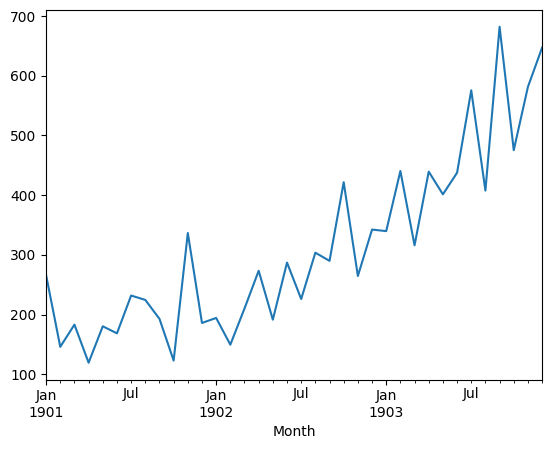

In [424]:
from datetime import datetime
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [397]:
series.index = series.index.to_period('M')

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415020, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


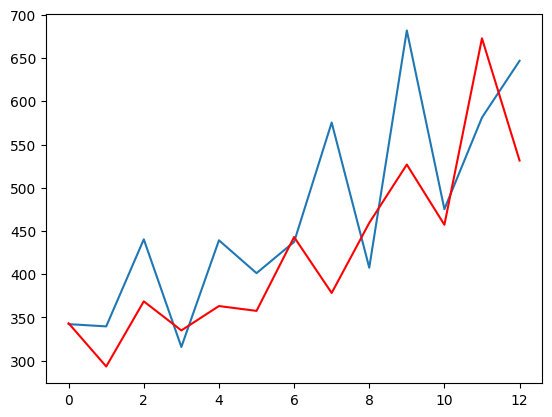

In [425]:
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

### Southern California Population data preprocessing

> Normalize dta by county for visualization 

In [145]:
socal_pop=pd.read_csv('socal_pop.csv')

In [146]:
socal_pop

,County,Year,Population,Normalized Population
0,Los Angeles County,2010,9823246,0.265512
1,Los Angeles County,2011,9876482,0.403942
2,Los Angeles County,2012,9935375,0.557082
3,Los Angeles County,2013,9992484,0.705583
4,Los Angeles County,2014,10040072,0.829326
...,...,...,...,...
125,Kern County,2018,893758,0.702444
126,Kern County,2019,900202,0.788236
127,Kern County,2020,905828,0.863138
128,Kern County,2021,912351,0.949981


In [72]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
pop_array=list()
for i in range(10):
    pop_array.append(list(socal_pop.iloc[13*i:13*(i+1)]['Population']))

In [80]:
scaler = MinMaxScaler()

In [93]:
set(socal_pop['County'])

{'Imperial County',
 'Kern County',
 'Los Angeles County',
 'Orange County',
 'Riverside County',
 'San Bernardino County',
 'San Diego County',
 'San Luis Obispo County',
 'Santa Barbara County',
 'Ventura County'}

In [94]:
nomr_la_pop=scaler.fit_transform(np.array(pop_array[0]).reshape(-1,1))
nomr_orange_pop=scaler.fit_transform(np.array(pop_array[1]).reshape(-1,1))
nomr_riverside_pop=scaler.fit_transform(np.array(pop_array[2]).reshape(-1,1))
nomr_sd_pop=scaler.fit_transform(np.array(pop_array[3]).reshape(-1,1))
nomr_bernandino_pop=scaler.fit_transform(np.array(pop_array[4]).reshape(-1,1))
nomr_sb_pop=scaler.fit_transform(np.array(pop_array[5]).reshape(-1,1))
nomr_ventura_pop=scaler.fit_transform(np.array(pop_array[6]).reshape(-1,1))
nomr_imperial_pop=scaler.fit_transform(np.array(pop_array[7]).reshape(-1,1))
nomr_slo_pop=scaler.fit_transform(np.array(pop_array[8]).reshape(-1,1))
nomr_kern_pop=scaler.fit_transform(np.array(pop_array[9]).reshape(-1,1))

In [107]:
norm_la_pop=pd.Series(nomr_la_pop.reshape(-1))
norm_or_pop=pd.Series(nomr_orange_pop.reshape(-1))
norm_riv_pop=pd.Series(nomr_riverside_pop.reshape(-1))
norm_sd_pop=pd.Series(nomr_sd_pop.reshape(-1))
norm_bn_pop=pd.Series(nomr_bernandino_pop.reshape(-1))
norm_sb_pop=pd.Series(nomr_sb_pop.reshape(-1))
norm_vt_pop=pd.Series(nomr_ventura_pop.reshape(-1))
norm_imp_pop=pd.Series(nomr_imperial_pop.reshape(-1))
norm_slo_pop=pd.Series(nomr_slo_pop.reshape(-1))
norm_kern_pop=pd.Series(nomr_kern_pop.reshape(-1))

In [109]:
norm_pop=pd.concat([norm_pop,norm_or_pop,norm_riv_pop,norm_sd_pop,norm_bn_pop,
          norm_sb_pop,norm_vt_pop,norm_imp_pop,norm_slo_pop,norm_kern_pop]).reset_index(drop=True)

In [111]:
socal_pop['Normalized Population']=norm_pop

In [113]:
#pd.DataFrame(socal_pop).to_csv('socal_pop.csv', encoding='utf-8', index=False)

In [362]:
socal_pop

,County,Year,Population,Normalized Population
0,Los Angeles County,2010,9823246,0.265512
1,Los Angeles County,2011,9876482,0.403942
2,Los Angeles County,2012,9935375,0.557082
3,Los Angeles County,2013,9992484,0.705583
4,Los Angeles County,2014,10040072,0.829326
...,...,...,...,...
125,Kern County,2018,893758,0.702444
126,Kern County,2019,900202,0.788236
127,Kern County,2020,905828,0.863138
128,Kern County,2021,912351,0.949981


In [368]:
fig = px.line(socal_pop, x='Year', y='Normalized Population', color='County', hover_data=['Population'], markers=True)
fig.update_layout(plot_bgcolor='white')
fig.update_layout(
    title={
        'text': "Southern California County Population Trend",
        'y':0.95,
        'x':0.445,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis = dict(
        showgrid=True,
        gridwidth=0.5,
        gridcolor='grey',
        griddash='dash',
        mirror=True,
        ticks='outside',
        showline=True,
        tickmode='linear',
        linecolor='black',
        linewidth=1),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        linewidth=1),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"))
fig.show()

In [7]:
top20_la_pop=la_pop_race.sort_values(by=['Total Population'], ascending=False).reset_index(drop=True).iloc[1:21]

In [8]:
fig = px.bar(top20_la_pop, x="Neighborhood", y="Total Population")
fig.update_traces(marker_line=dict(width=2, color='black'))
fig.update_layout(paper_bgcolor="white",
                  plot_bgcolor='white')
fig.update_xaxes(tickangle= -75)
fig.update_layout(
    width=800,
    height=800,
    title={
        'text': 'Top 20 Neighborhood Population in LA County',
        'y':0.975,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    showlegend = False,
    xaxis = dict(
        mirror=True,
        ticks='outside',
        title=None,
        showline=True,
        linecolor='black',
        linewidth=2),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        title='Population',
        linewidth=2),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"
    ))
fig.show()

In [9]:
top20_la_pop_dense=la_pop_dense.iloc[:20]

In [10]:
fig = px.bar(top20_la_pop_dense, x="NEIGHBORHOOD", y="POPULATION PER SQMI")
fig.update_traces(marker_line=dict(width=2, color='black'))
fig.update_layout(paper_bgcolor="white",
                  plot_bgcolor='white')
fig.update_xaxes(tickangle= -75)
fig.update_layout(
    width=800,
    height=800,
    title={
        'text': 'Top 20 Most dense Neighborhood in LA County',
        'y':0.975,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    showlegend = False,
    xaxis = dict(
        mirror=True,
        ticks='outside',
        title=None,
        showline=True,
        linecolor='black',
        linewidth=2),
    yaxis = dict(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        title='Population per sqm',
        linewidth=2),
    font=dict(
        family="Times New Roman",
        size=15,
        color="Black"
    ))
fig.show()

### Neighborhood Shape data

In [11]:
neighborhood = gpd.read_file('l.a. county neighborhood (current).shp')

In [261]:
# 'Florence-Firestone(shp) = Florence-Graham'
neighborhood.loc[neighborhood['name']=='Florence-Firestone']

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry
79,florence-firestone,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),florence-firestone,Florence-Firestone,Florence-Firestone L.A. County Neighborhood (C...,3.57948601666,unincorporated-area,NaN,NaN,"POLYGON ((-118.25644 33.98950, -118.23902 33.9..."


In [358]:
home_values_one

,Neighborhood,2022,2021,2020,2019,2018,2017
0,Acton,8.665240e+05,841225.0,620082.0000,611452.0000,6.894450e+05,584092.0000
1,Agoura Hills,1.329658e+06,1238322.0,957748.0000,961194.0000,1.046715e+06,953781.0000
2,Agua Dulce,9.150270e+05,885919.0,667503.0000,663575.0000,7.339690e+05,642369.0000
3,Alhambra,9.196845e+05,906104.0,723324.5000,722779.5000,7.883850e+05,677070.5000
4,Altadena,1.231663e+06,1205289.0,894732.0000,880781.0000,9.923530e+05,838237.0000
...,...,...,...,...,...,...,...
166,Whittier,7.899067e+05,759871.0,596399.6667,590893.6667,6.587667e+05,565635.6667
167,Willowbrook,5.778180e+05,567449.0,443160.0000,417265.0000,4.910580e+05,384922.0000
168,Wilmington,6.469590e+05,634598.0,484354.0000,472781.0000,5.386460e+05,440067.0000
169,Winnetka,8.333180e+05,808386.0,609123.0000,600022.0000,6.781290e+05,567192.0000


In [359]:
neighborhood.loc[neighborhood['slug']=='westwood']

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry
264,westwood,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),westwood,Westwood,Westwood L.A. County Neighborhood (Current),3.6757772963,segment-of-a-city,NaN,NaN,"POLYGON ((-118.42991 34.07931, -118.42901 34.0..."


In [352]:
ktown=neighborhood.loc[neighborhood['slug']=='koreatown']

In [353]:
ktown_lst = []
for i in tqdm(range(len(la_places)), desc='checking neighborhoods...'):
    pt = Point(la_places['lon'][i], la_places['lat'][i])
    withinzip = pt.within(neighborhood.loc[neighborhood['slug']=='koreatown']['geometry'].values[0])
    if withinzip == True:
        ktown_lst.append(i)

checking neighborhoods...: 100%|██████| 239509/239509 [01:32<00:00, 2588.01it/s]


In [354]:
ktown_places=la_places.iloc[ktown_lst]
ktown_places=ktown_places.reset_index(drop=True)

In [355]:
unique_ind=ktown_places['name'].drop_duplicates().index

In [356]:
ktown_latlong=ktown_places.iloc[unique_ind]

In [357]:

mapbox_access_token = "pk.eyJ1IjoibWFwYm94c2VvIiwiYSI6ImNsZHo0ejU0dzBxMHAzb292Ym41Yzk4bzMifQ.ZYVGCdm8E2kH2QGi2gd9ng"

fig = px.choropleth_mapbox(ktown,
                           geojson=ktown.geometry,
                           locations=ktown.index,
                           #color_continuous_scale="Teal",
                           color='name',
                           color_discrete_map={'Koreatown':'rgba(179,205,227,0.3)'},
                           mapbox_style="carto-positron",
                          center={"lat": 34.0711826, "lon": -118.4434044})
fig.add_scattermapbox(
        lat=ktown_latlong['lat'],
        lon=ktown_latlong['lon'],
        mode='markers',
        name='Social Places',
        marker=go.scattermapbox.Marker(
            size=5,
            color='rgba(239,85,59, 0.3)'
        )
    )

fig.update_layout(
    autosize=True,
    hovermode='closest',
    title_text ='K-town Places',
    title_x =0.5, 
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.060326, 
            lon=-118.301028
        ),
        pitch=0,
        zoom=12.25
    ),
)

fig.show()

In [63]:
mapbox_access_token = "pk.eyJ1IjoibWFwYm94c2VvIiwiYSI6ImNsZHo0ejU0dzBxMHAzb292Ym41Yzk4bzMifQ.ZYVGCdm8E2kH2QGi2gd9ng"


fig = px.choropleth_mapbox(ktown,
                           geojson=ktown.geometry,
                           locations=ktown.index,
                           #color_continuous_scale="Teal",
                           color='name',
                           color_discrete_map={'Koreatown':'rgba(179,205,227,0.3)'},
                           mapbox_style="carto-positron",
                          center={"lat": 34.0215432, "lon": -118.2855741})

fig.add_scattermapbox(
        lat=park_loc['GeoLat'],
        lon=park_loc['GeoLong'],
        mode='markers',
        name='Parks',
        marker=go.scattermapbox.Marker(
            size=5,
            color='rgba(99,110,250,0.7)'
        )
    )

fig.add_scattermapbox(
        lat=hospital_loc['Y'],
        lon=hospital_loc['X'],
        mode='markers',
        name='Hospitals',
        marker=go.scattermapbox.Marker(
            size=5,
            color='rgba(0,204,150, 0.7)'
        )
    )

fig.update_layout(
    autosize=True,
    hovermode='closest',
    title_text ='Location of Parks and Hospitals near K-town',
    title_x =0.5, 
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=34.060326, 
            lon=-118.301028
        ),
        pitch=0,
        zoom=12
    ),
)

fig.show()

In [31]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [32]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)

In [44]:
X_display

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States
32557,40.0,Private,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States
32558,58.0,Private,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States
32559,22.0,Private,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States


In [34]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.54663
[100]	test-logloss:0.36373
[200]	test-logloss:0.31793
[300]	test-logloss:0.30061
[400]	test-logloss:0.29207
[500]	test-logloss:0.28678
[600]	test-logloss:0.28381
[700]	test-logloss:0.28181
[800]	test-logloss:0.28064
[900]	test-logloss:0.27992
[1000]	test-logloss:0.27928
[1018]	test-logloss:0.27935


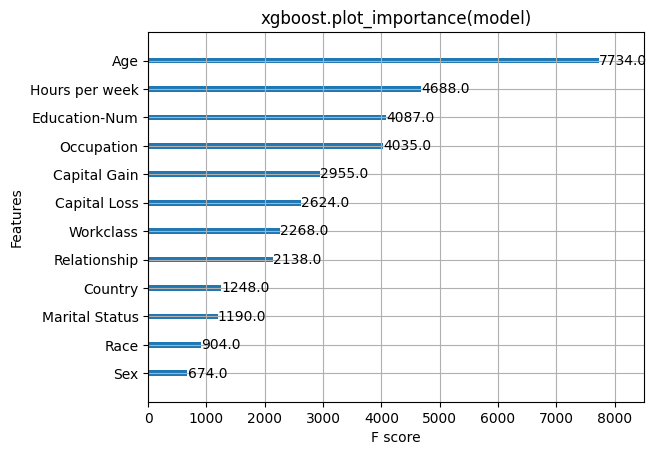

In [35]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

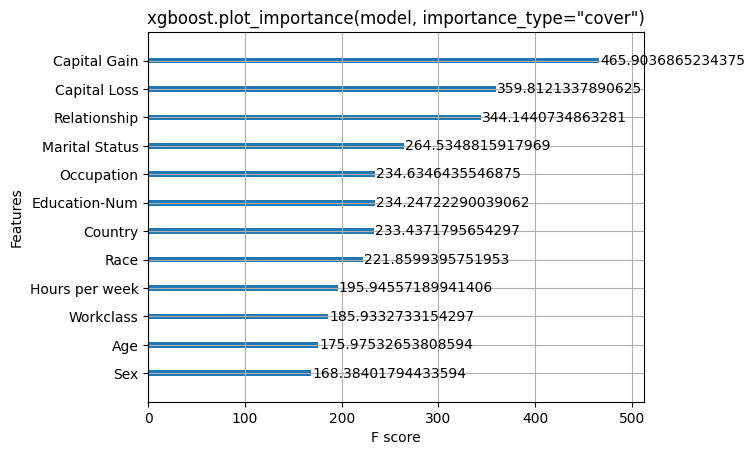

In [36]:
xgboost.plot_importance(model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()

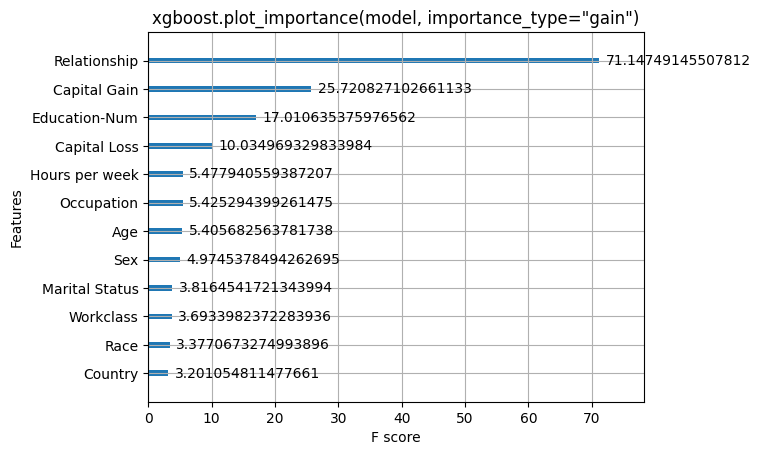

In [37]:
xgboost.plot_importance(model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [38]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [50]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [40]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_display.iloc[:1000,:])

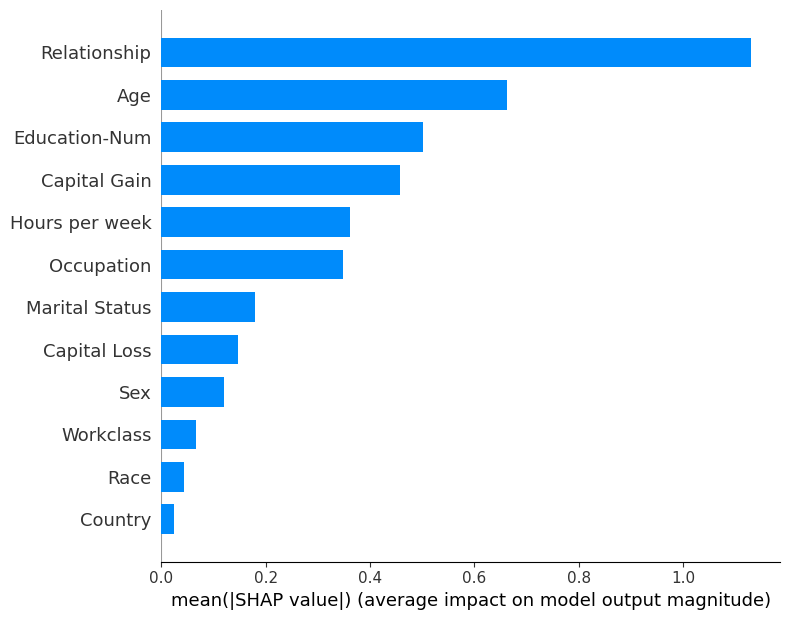

In [41]:
shap.summary_plot(shap_values, X_display, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


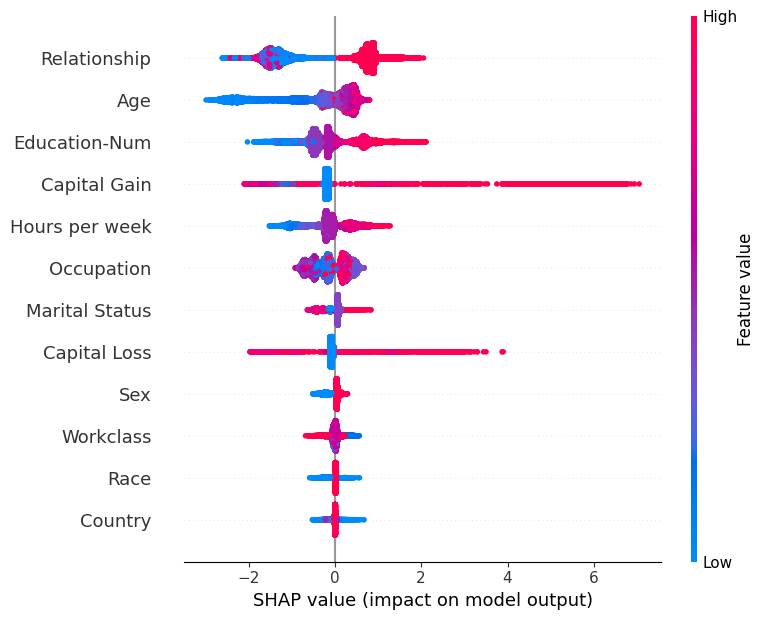

In [42]:
shap.summary_plot(shap_values, X)

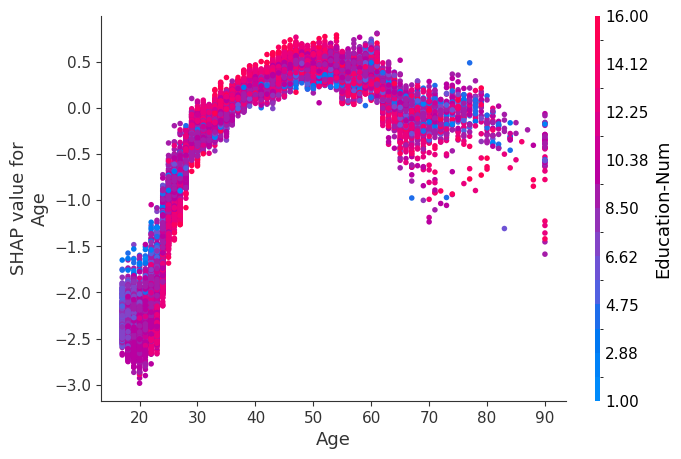

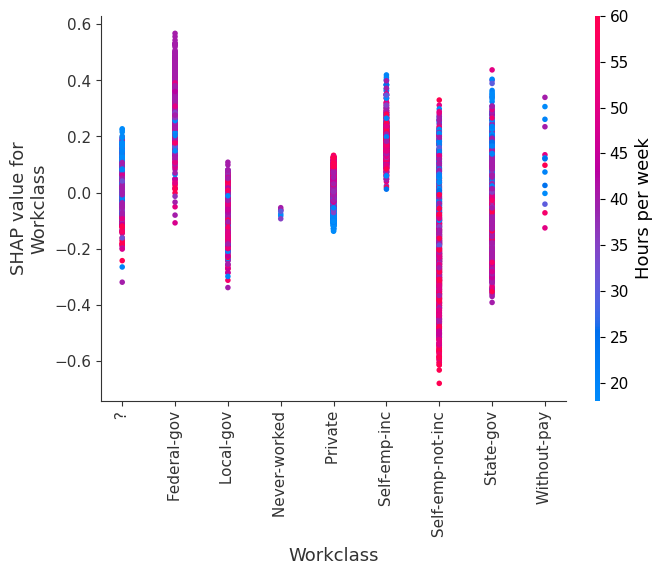

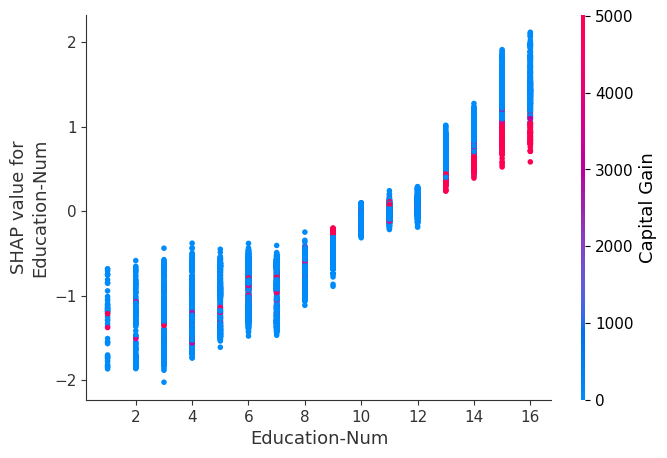

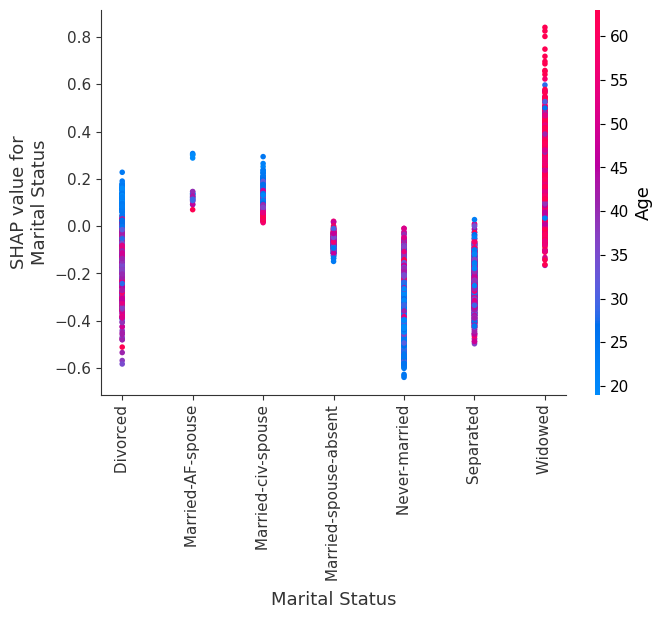

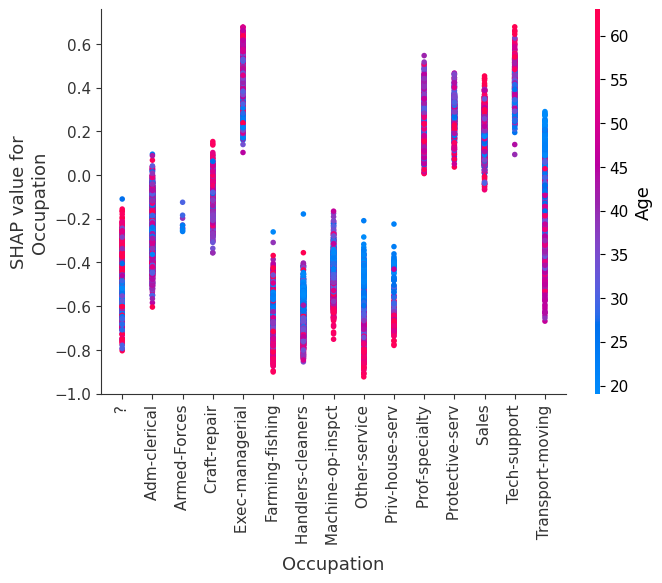

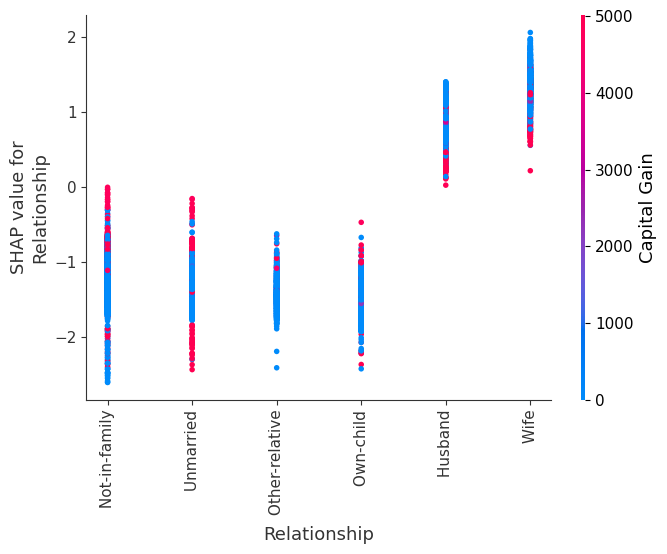

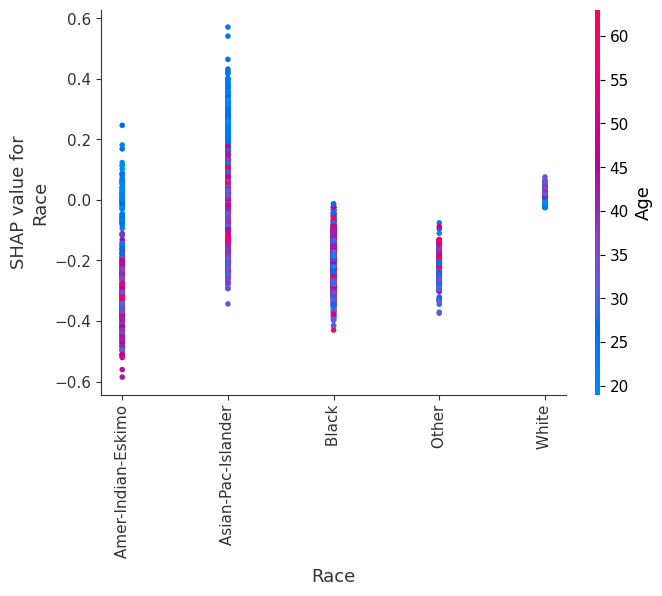

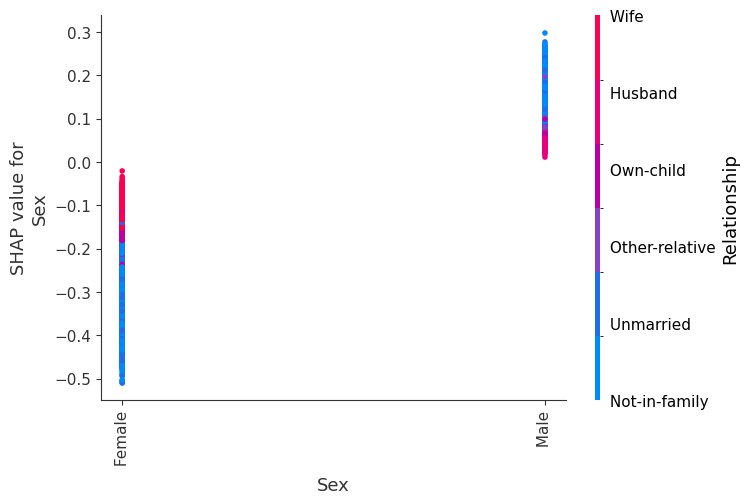

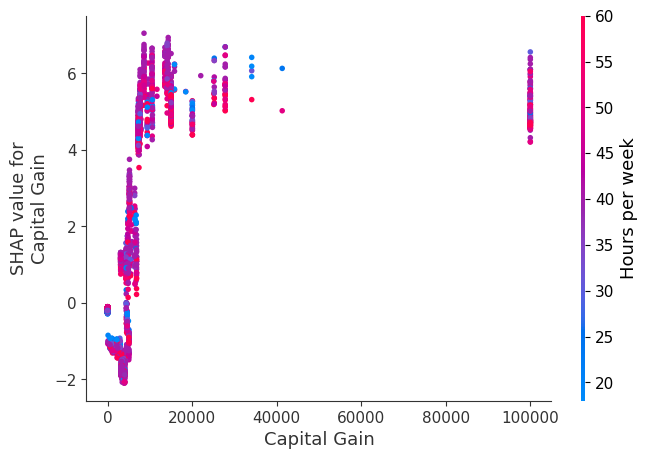

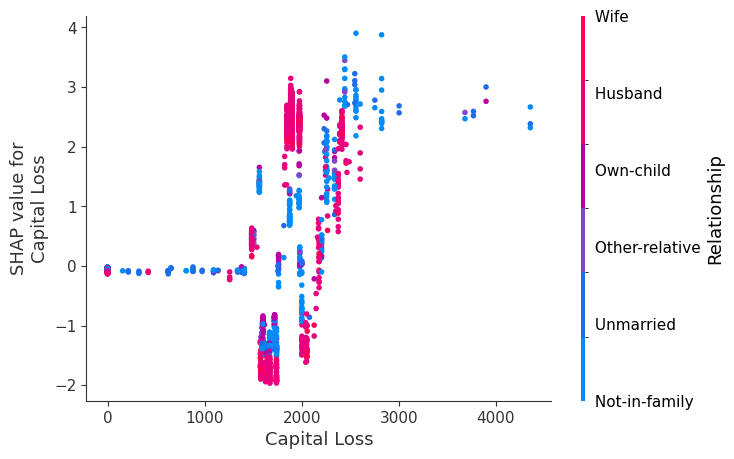

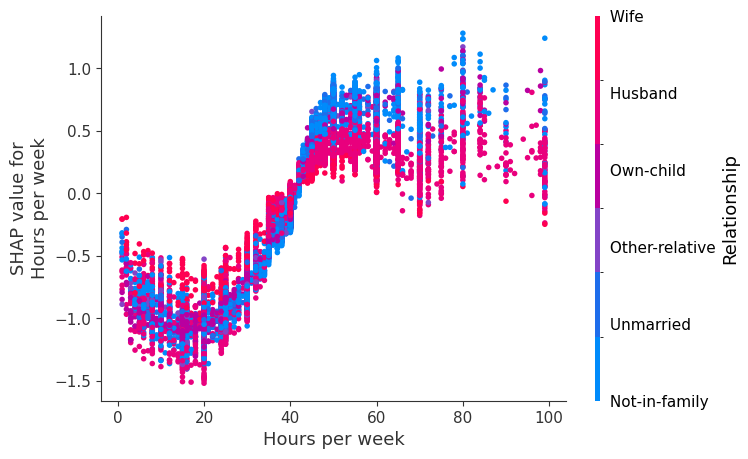

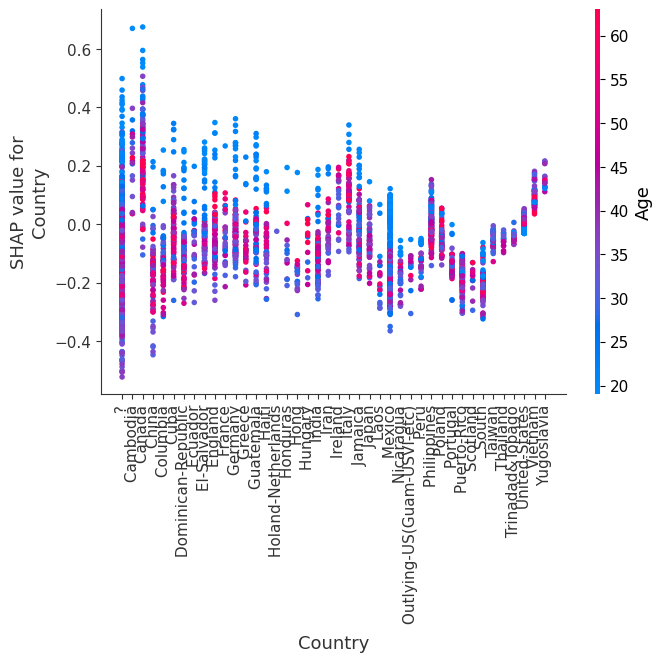

In [43]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_display)